# Сборный проект № 1

## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd #импортируем библиотеки
import plotly.express as px
import matplotlib 
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st

In [3]:
# откроем файлы с данными

try:
    df = pd.read_csv('c:\ya\games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

## Описание данных:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В таблице 16715 строк, 11 столбца, пропуски в столбцах: Year_of_Release, Critic_Score, User_Score, Rating. 

## Подготовка данных:

1. Заменим названия столбцов (приведем к нижнему регистру): 

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.head(5) # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


2. Избавимся от пропусков:

In [9]:
df = df.dropna(subset=['name']) # пропусков в name мало (всего 2), поэтому просто удалим, это не повлияет на расчеты

 * чтобы избавиться от пропусков в year_of_release сгруппируем по platform и возьмем медиану

In [10]:
df['year_of_release'] = df['year_of_release'].fillna(df.groupby(['platform'])['year_of_release'].transform('median'))

In [11]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

2.  Преобразуем данные в нужные типы: 

In [12]:
df['year_of_release'] = df['year_of_release'].astype('int') # год выпуска в виде целого

In [13]:
df['user_score']=df['user_score'].replace('tbd', np.nan) # tbd заменим на NaN

In [14]:
df['user_score']=df['user_score'].fillna(np.nan) # заменим пропуски на NaN

In [15]:
df['critic_score']=df['critic_score'].fillna(np.nan)  # заменим пропуски на Nan

In [18]:
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce') # заменим тип object в числовой

In [19]:
df.dtypes # проверка

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [20]:
df['rating']=df['rating'].fillna('no_rating')

In [21]:
df.isnull().sum() # проверим пропуски

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

In [22]:
df['rating'].unique() # оценим уникальные значения rating

array(['E', 'no_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

3. Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец:

In [23]:
df['sum_sales'] = df[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis=1) # возьмем сумму по столбцам

In [24]:
df.head(5) # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


## Проведем исследовательский анализ данных

### 1. Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Для этого сгруппируем количество названий игр по годам. В разные года выпускалось различное количество игр. До 1994 года игр было малое количество.  После 2011 небольшое падение количества игр. 

In [25]:
df_gody = df.pivot_table(index= 'year_of_release', values = 'name', aggfunc='count')

In [26]:
df_gody.rename(columns={'name':'name_count'}).head(5)

,name_count
year_of_release,
1980,9
1981,46
1982,53
1983,17
1984,14


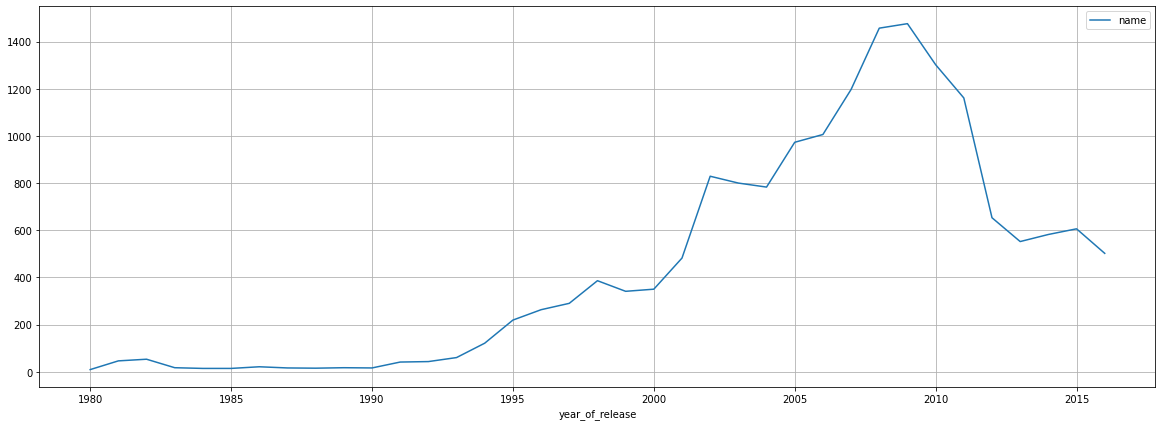

In [27]:
df_gody.plot(figsize =(20,7), grid = True)
plt.show()

### 2. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постоим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [28]:
# выбрали платформы с наибольшими суммарными продажами
top_platforms = df.groupby('platform')['sum_sales'].sum().sort_values(ascending = False).head(10)
top_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sum_sales, dtype: float64

In [29]:
# выбрали из df все значения в соответствии с top_platforms:
df_top_platform = df[df['platform'].isin(top_platforms.index)]
df_top_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,no_rating,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01


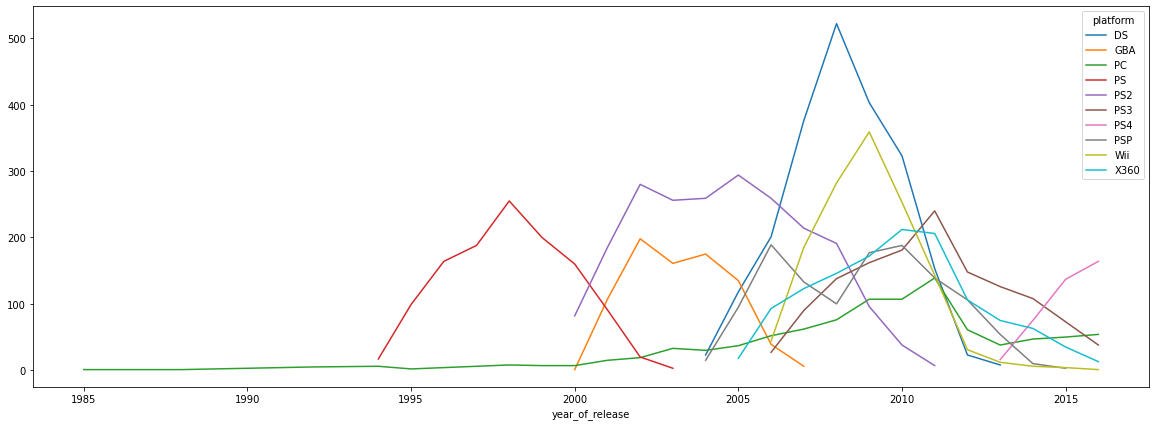

In [31]:
# построим графики распределения 10 платформ с наибольшими суммарними продажами по годам  
pivot_top_platform = pd.pivot_table(df_top_platform, index = 'year_of_release', columns='platform', values ='name',
                                    aggfunc='count')
pivot_top_platform.plot(figsize =(20,7))
plt.show()

По графику распределения видно, что в среднем 5 лет между появлением новых и исчезанием платформ. 

### 3, 4. Возьмем данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.

Думаю, что актуальным является период с 2000 года, так как на графике видно, что с этого времени начинает активно развиваться продажа игровых платформ. Данные с этого года могут влиять на прогноз 2017. 

In [32]:
df = df.query('year_of_release >= 2011')
df.head(5)               
          

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60


### 5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Сгруппируем по платформам и году выпуска. Построим график зависимости количества продаж от этих параметров. 

In [33]:
#df_platform_leader = df.groupby(['platform', 'year_of_release'])['sum_sales'].sum().sort_values(
 #   ascending = False).plot(figsize =(20,5), grid = True)

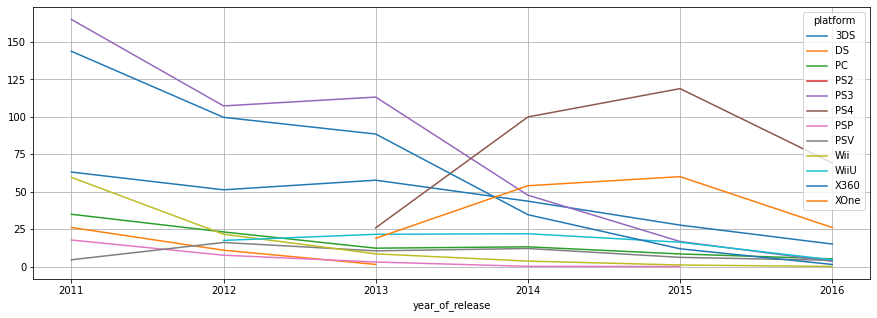

In [34]:
df_platform_leader = df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum') .plot(
    figsize =(15,5), grid = True)

### 6. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

(0.0, 40.0)

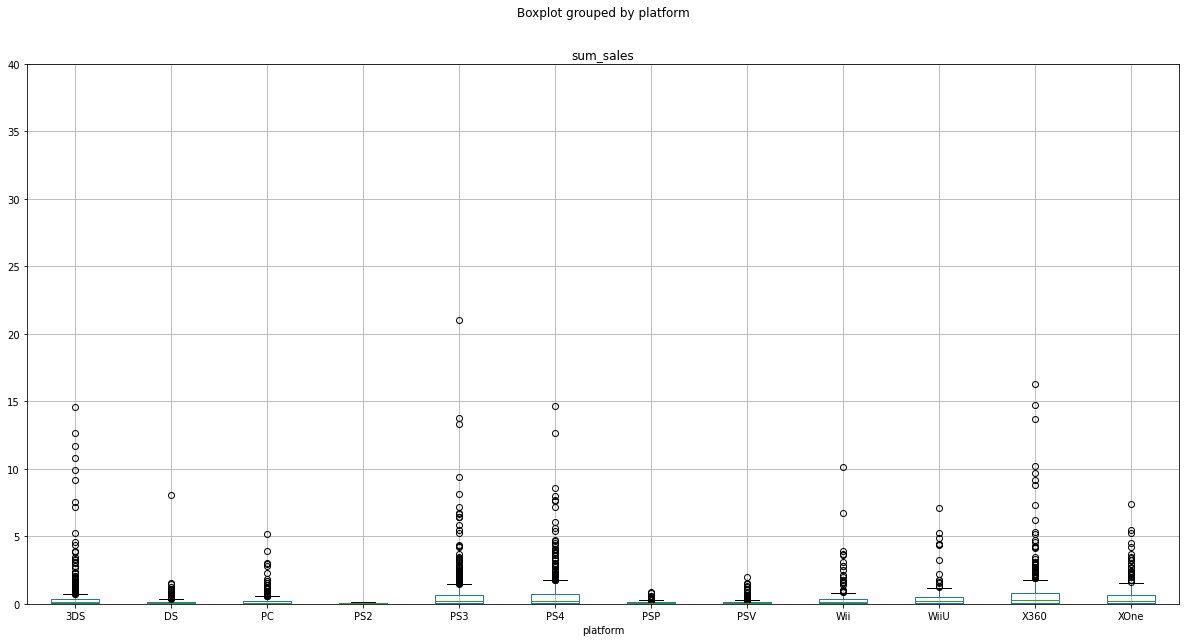

In [35]:
df.boxplot(column="sum_sales", by="platform", figsize=(20, 10))
plt.ylim(0, 40)

Из графика видно, что для некоторых платформ суммарное значение продаж значительно превышает среднее. Таким образом можно выявить очень успешные по продажам платформы. Это DS, GB, PS2, PS3, Wii и X360.

### 7. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Выберем одну игровую платформу: например Wii (одна из лидеров по продажам). Построим диаграмму рассеяния.  

In [36]:
df_Wii = df.query('platform == "Wii"') # сделаем выборку по одной платформе

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

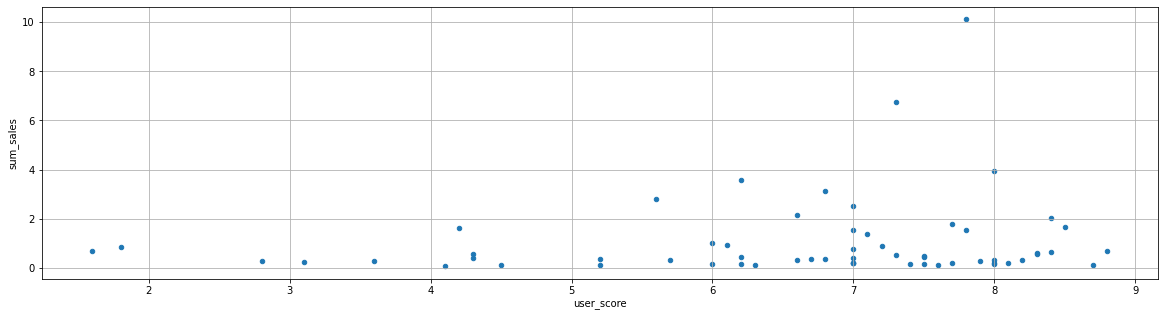

In [37]:
df_Wii.plot(kind = 'scatter', x = 'user_score', y = 'sum_sales', figsize=(20,5), grid = True)
# на диаграмме зависимость продаж от оценки пользователей

In [38]:
df_Wii['user_score'].corr(df_Wii['sum_sales']) # рассчитаем коэффициент корреляции для одной платформы

0.14550376734945006

График позволяет сделать вывод: к оценке пользователя 8 ростет и количество продаж, при данной оценке наблюдается максимум продаж. Это характерно на примере одной игровой платфомы Wii. Коэффициент корреляции равный 0,11 говорит о том, что связь между величинами слабая. 

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

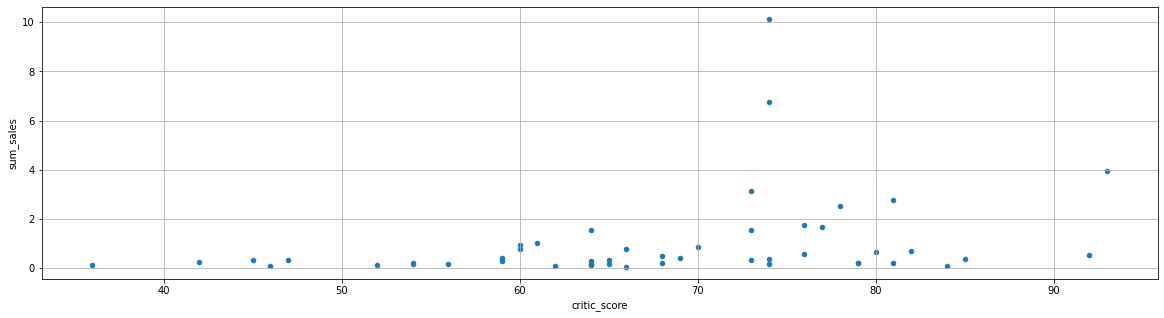

In [39]:
df_Wii.plot(kind = 'scatter', x = 'critic_score', y = 'sum_sales', figsize=(20,5), grid = True)
# диаграмма зависимости продаж от оценки критиков

In [40]:
df_Wii['critic_score'].corr(df_Wii['sum_sales']) # рассчитаем коэффициент корреляции

0.2922694954272934

График позволяет сделать вывод: к оценке критиков 75 ростет и количество продаж, при данной оценке наблюдается максимум продаж. Это характерно на примере одной игровой платфомы Wii. Коэффициент корреляции равный 0,17 говорит о том, что связь между величинами слабая.

### 8. Соотнесем выводы с продажами игр на других платформах.

Построим диаграммы рассеяния для других платформ: 

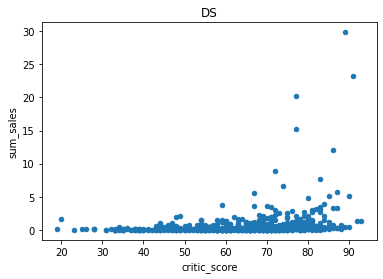

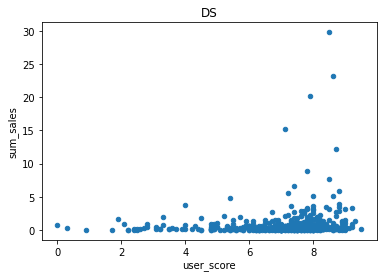

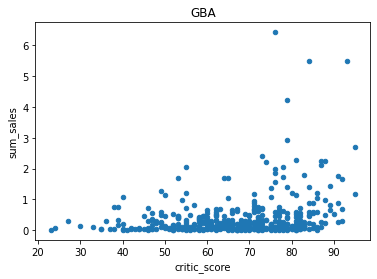

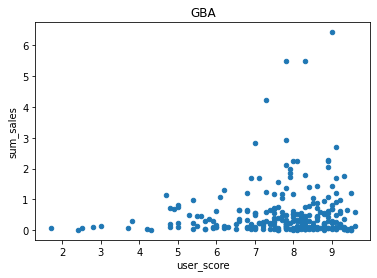

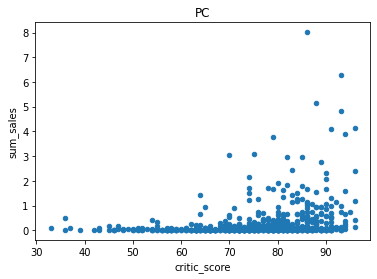

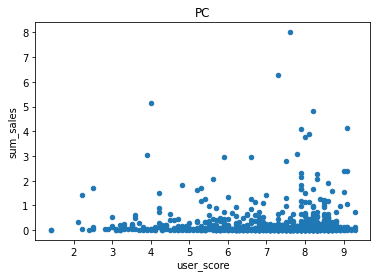

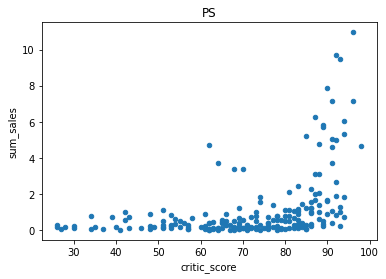

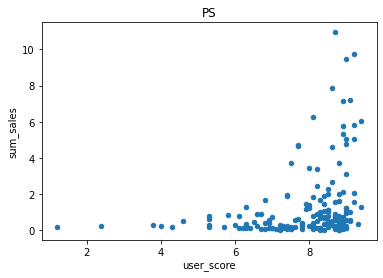

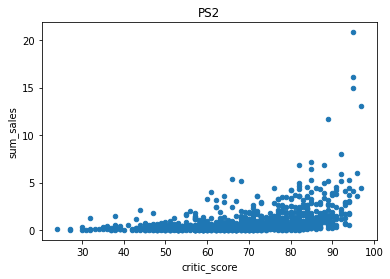

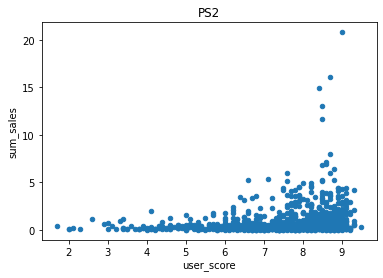

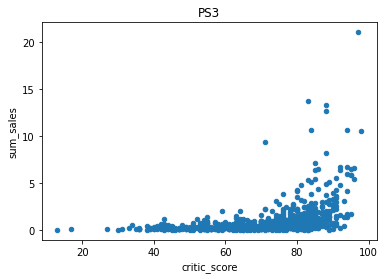

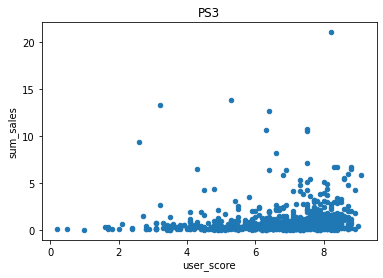

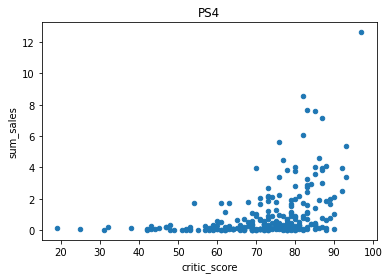

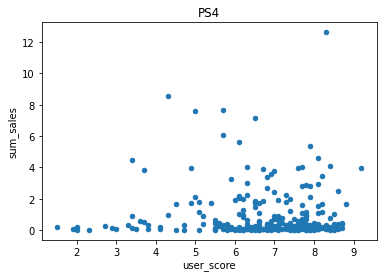

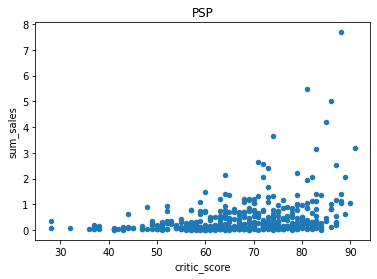

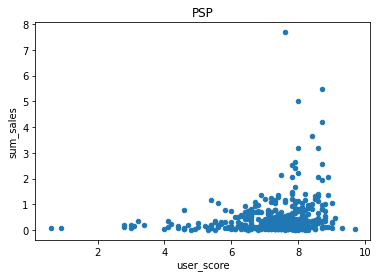

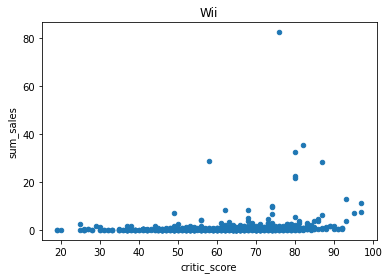

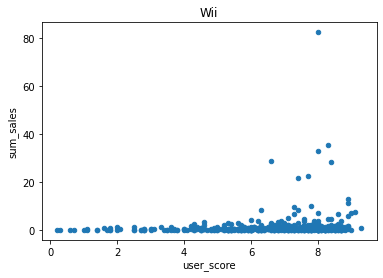

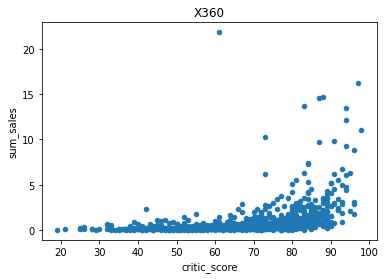

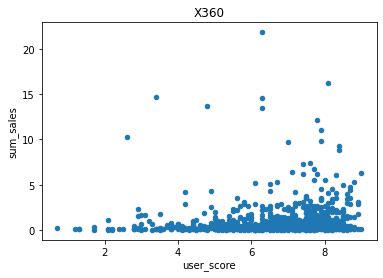

In [41]:
for platform, df_platform in df_top_platform.groupby('platform'):
    df_platform.plot(kind='scatter', x='critic_score', y='sum_sales', title = platform)
    df_platform.plot(kind='scatter', x='user_score', y='sum_sales', title = platform)
    plt.show()   
   

In [42]:
for platform, df_platform in df_top_platform.groupby('platform'):
    print(platform, 'коэффициент корреляции между оценкой пользователя и продажами:', 
          df_platform['user_score'].corr(df_platform['sum_sales']))
    print(platform, 'коэффициент корреляции между оценкой критиков и продажами:', 
          df_platform['critic_score'].corr(df_platform['sum_sales']))
    print()

DS коэффициент корреляции между оценкой пользователя и продажами: 0.1304355011164249
DS коэффициент корреляции между оценкой критиков и продажами: 0.23637945738859772

GBA коэффициент корреляции между оценкой пользователя и продажами: 0.10075832231916067
GBA коэффициент корреляции между оценкой критиков и продажами: 0.23910123563895744

PC коэффициент корреляции между оценкой пользователя и продажами: 0.01047568462148642
PC коэффициент корреляции между оценкой критиков и продажами: 0.25688673789482114

PS коэффициент корреляции между оценкой пользователя и продажами: 0.29797783612684925
PS коэффициент корреляции между оценкой критиков и продажами: 0.44563998586242454

PS2 коэффициент корреляции между оценкой пользователя и продажами: 0.17286551112058227
PS2 коэффициент корреляции между оценкой критиков и продажами: 0.39543454945454876

PS3 коэффициент корреляции между оценкой пользователя и продажами: 0.12669133936341692
PS3 коэффициент корреляции между оценкой критиков и продажами: 0.

По графикам (диаграммам рассеяния), а также данным по коэффициентам корреляции можно сделать вывод: 
    связь между оценками пользователей или оценками критиков и продажами очень слабая. 

### 9. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

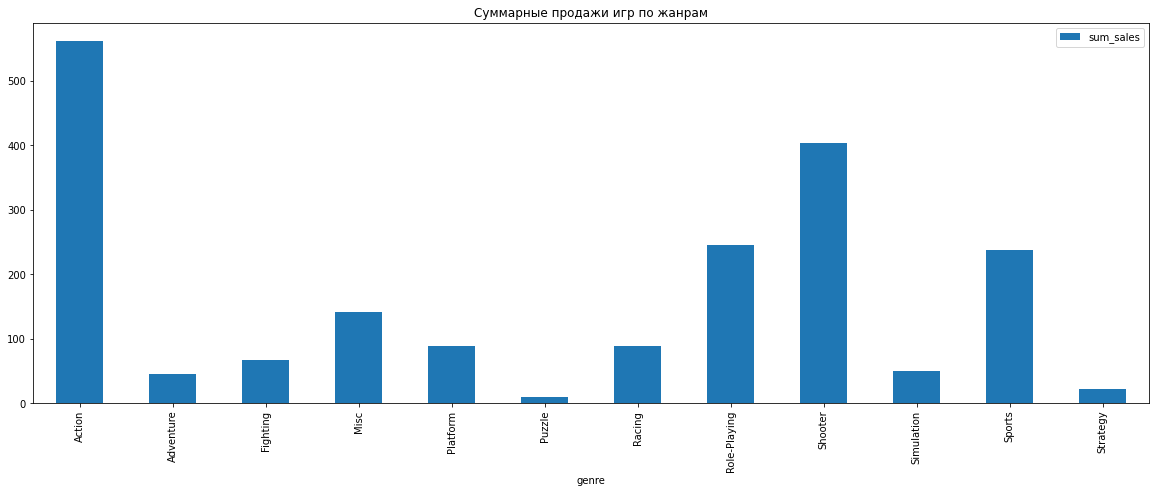

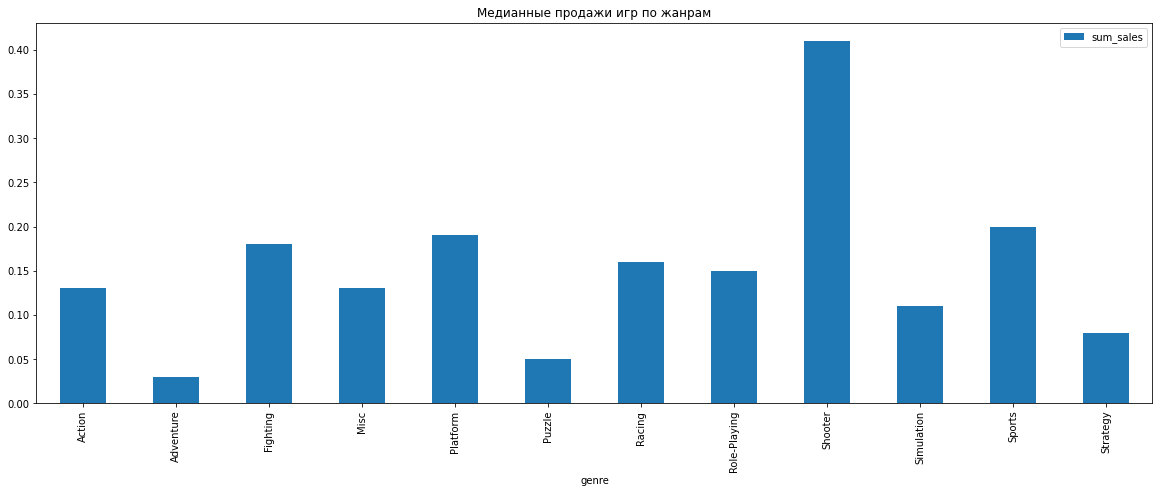

In [45]:
df_raspred_sum = df.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'sum')
df_raspred_sum.plot(kind = 'bar', figsize =(20,7), title = 'Суммарные продажи игр по жанрам')

df_raspred_median = df.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'median')
df_raspred_median.plot(kind = 'bar', figsize =(20,7), title = 'Медианные продажи игр по жанрам')

plt.show()


Самые покупаемые игры жанра Action, Shooter, Sports наименее всего покупают Puzzle и Strategy.  

## Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [46]:
pivot_na_platform_sales = pd.pivot_table(df_top_platform, index = 'platform', values=['na_sales','sum_sales'],aggfunc='sum')
# Продажи в Северной Америке
pivot_na_platform_sales = pivot_na_platform_sales.sort_values(by='na_sales', ascending=False).head(5)
pivot_na_platform_sales

,na_sales,sum_sales
platform,,
X360,602.47,971.42
PS2,583.84,1255.77
Wii,496.90,907.51
PS3,393.49,939.65
DS,382.40,806.12


In [47]:
pivot_na_platform_sales['share_sales'] = pivot_na_platform_sales['na_sales']/pivot_na_platform_sales['sum_sales']
pivot_na_platform_sales
# вычислила долю продаж каждой платформы в Америке к сумме всех продаж (сумма продаж платформы по всем регионам)

,na_sales,sum_sales,share_sales
platform,,,
X360,602.47,971.42,0.620195
PS2,583.84,1255.77,0.464926
Wii,496.90,907.51,0.547542
PS3,393.49,939.65,0.418762
DS,382.40,806.12,0.474371


<AxesSubplot:ylabel='share_sales'>

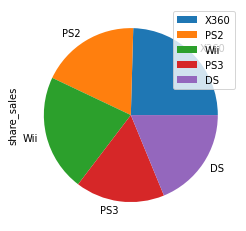

In [48]:
pivot_na_platform_sales.plot(kind='pie',y="share_sales")
# Круговая диаграмма долей продаж по платформам по Северной Америке

Самые популярные по продажам в Северной Америке платформы X360, PS2. Замыкает тор 5 - DS. 

In [49]:
pivot_eu_platform_sales = pd.pivot_table(df_top_platform, index = 'platform', values=['eu_sales','sum_sales'],aggfunc='sum')
# Продажи в Европе
pivot_eu_platform_sales = pivot_eu_platform_sales.sort_values(by ='eu_sales', ascending=False).head(5)
pivot_eu_platform_sales

,eu_sales,sum_sales
platform,,
PS2,339.29,1255.77
PS3,330.29,939.65
X360,270.76,971.42
Wii,262.21,907.51
PS,213.61,730.86


In [50]:
pivot_eu_platform_sales['share_sales'] = pivot_eu_platform_sales['eu_sales']/pivot_eu_platform_sales['sum_sales']
pivot_eu_platform_sales
# вычислила долю продаж каждой платформы в Европе к сумме всех продаж (сумма продаж платформы по всем регионам)

,eu_sales,sum_sales,share_sales
platform,,,
PS2,339.29,1255.77,0.270185
PS3,330.29,939.65,0.351503
X360,270.76,971.42,0.278726
Wii,262.21,907.51,0.288933
PS,213.61,730.86,0.292272


<AxesSubplot:ylabel='share_sales'>

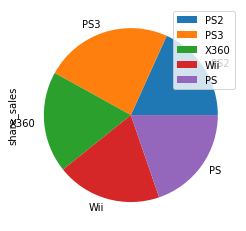

In [51]:
pivot_eu_platform_sales.plot(kind='pie',y="share_sales")
# Круговая диаграмма долей продаж по платформам по Европе

Самая продаваемая игровая платформа в Европе  PS2. Замыкает тор 5 - PS. 

In [52]:
pivot_jp_platform_sales = pd.pivot_table(df_top_platform, index = 'platform', values=['jp_sales','sum_sales'],aggfunc='sum')
# Продажи в Японии
pivot_jp_platform_sales = pivot_jp_platform_sales.sort_values(by ='jp_sales', ascending=False).head(5)
pivot_jp_platform_sales

,jp_sales,sum_sales
platform,,
DS,175.57,806.12
PS,139.82,730.86
PS2,139.20,1255.77
PS3,80.19,939.65
PSP,76.78,294.05


In [53]:
pivot_jp_platform_sales['share_sales'] = pivot_jp_platform_sales['jp_sales']/pivot_jp_platform_sales['sum_sales']
pivot_jp_platform_sales
# вычислила долю продаж каждой платформы в Японии к сумме всех продаж (сумма продаж платформы по всем регионам)

,jp_sales,sum_sales,share_sales
platform,,,
DS,175.57,806.12,0.217796
PS,139.82,730.86,0.191309
PS2,139.20,1255.77,0.110848
PS3,80.19,939.65,0.085340
PSP,76.78,294.05,0.261112


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='share_sales'>

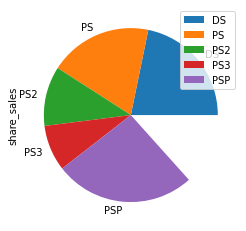

In [54]:
pivot_jp_platform_sales.plot(kind='pie',y="share_sales")
# Круговая диаграмма долей продаж по платформам по Японии

Самая продаваемая игровая платформа в Японии DS. Замыкает тор 5 - PSP.

PS2 платформа, которая входит в пятерку самых продаваемых по рассматриваемым регионам мира.

2. Определим самые популярные жанры (топ-5). Поясним разницу.

In [55]:
df_top_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [56]:
pivot_na_genre_sales = pd.pivot_table(df_top_platform, index = 'genre', values=['na_sales','sum_sales'],aggfunc=('sum'))
# Продажи по жанрам в Северной Америке
pivot_na_genre_sales = pivot_na_genre_sales.sort_values(by='na_sales', ascending=False).head(5)
pivot_na_genre_sales

,na_sales,sum_sales
genre,,
Action,690.88,1415.36
Sports,562.27,1111.93
Shooter,423.99,810.74
Misc,359.25,702.94
Racing,265.39,564.17


In [57]:
pivot_na_genre_sales['share_sales'] = pivot_na_genre_sales['na_sales']/pivot_na_genre_sales['sum_sales']
pivot_na_genre_sales

,na_sales,sum_sales,share_sales
genre,,,
Action,690.88,1415.36,0.488130
Sports,562.27,1111.93,0.505670
Shooter,423.99,810.74,0.522967
Misc,359.25,702.94,0.511068
Racing,265.39,564.17,0.470408


<AxesSubplot:ylabel='share_sales'>

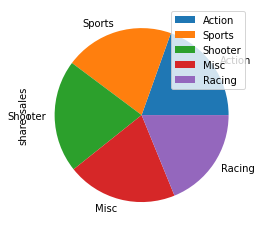

In [58]:
pivot_na_genre_sales.plot(kind='pie',y="share_sales")
# Круговая диаграмма долей продаж по жанрам по Северной Америке

В Северной Америке лидирует жанр игровой платфомы  Action, замыкает 5-ку Racing.

In [59]:
pivot_eu_genre_sales = pd.pivot_table(df_top_platform, index = 'genre', values=['eu_sales','sum_sales'],aggfunc=('sum'))
# Продажи по жанрам в Европе
pivot_eu_genre_sales = pivot_eu_genre_sales.sort_values(by='eu_sales', ascending=False).head(5)
pivot_eu_genre_sales

,eu_sales,sum_sales
genre,,
Action,446.47,1415.36
Sports,337.88,1111.93
Shooter,269.86,810.74
Racing,196.94,564.17
Misc,194.76,702.94


In [60]:
pivot_eu_genre_sales['share_sales'] = pivot_eu_genre_sales['eu_sales']/pivot_eu_genre_sales['sum_sales']
pivot_eu_genre_sales


,eu_sales,sum_sales,share_sales
genre,,,
Action,446.47,1415.36,0.315446
Sports,337.88,1111.93,0.303868
Shooter,269.86,810.74,0.332856
Racing,196.94,564.17,0.349079
Misc,194.76,702.94,0.277065


<AxesSubplot:ylabel='share_sales'>

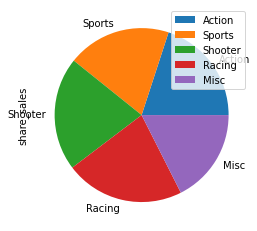

In [61]:
pivot_eu_genre_sales.plot(kind='pie',y="share_sales")
# Круговая диаграмма долей продаж по жанрам по Европе

В Европе также лидируют игры с жанром Action, замыкает 5-ку Misc. 

In [62]:
pivot_jp_genre_sales = pd.pivot_table(df_top_platform, index = 'genre', values=['jp_sales','sum_sales'],aggfunc=('sum'))
# Продажи по жанрам в Японии
pivot_jp_genre_sales = pivot_jp_genre_sales.sort_values(by='jp_sales', ascending=False).head(5)
pivot_jp_genre_sales

,jp_sales,sum_sales
genre,,
Role-Playing,210.18,644.97
Action,107.87,1415.36
Sports,84.83,1111.93
Misc,78.20,702.94
Fighting,47.47,319.17


In [63]:
pivot_jp_genre_sales['share_sales'] = pivot_jp_genre_sales['jp_sales']/pivot_jp_genre_sales['sum_sales']
pivot_jp_genre_sales

,jp_sales,sum_sales,share_sales
genre,,,
Role-Playing,210.18,644.97,0.325876
Action,107.87,1415.36,0.076214
Sports,84.83,1111.93,0.076291
Misc,78.20,702.94,0.111247
Fighting,47.47,319.17,0.148730


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='share_sales'>

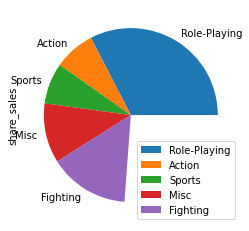

In [64]:
pivot_jp_genre_sales.plot(kind='pie',y="share_sales")
# Круговая диаграмма долей продаж по жанрам по Японии

В Японии по жанрам лидирует Role-Playing, замыкает 5 -ку игры с жанром Fighting. 

Action самый популярный жанр по всем рассматриваемым регионам. 

3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [65]:
df_top_platform.head(5)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [66]:
pivot_na_rating_sales = pd.pivot_table(df_top_platform, index = 'rating', values='na_sales', aggfunc=('sum'))
pivot_na_rating_sales= pivot_na_rating_sales.sort_values(by = 'na_sales', ascending=False)
pivot_na_rating_sales #Соотношение рейтинга ESRB и продаж в Северной Америке

,na_sales
rating,
E,1105.53
M,642.27
T,636.43
no_rating,599.57
E10+,307.80
K-A,2.56
EC,1.44
RP,0.00


In [67]:
pivot_eu_rating_sales = pd.pivot_table(df_top_platform, index = 'rating', values='eu_sales', aggfunc=('sum'))
pivot_eu_rating_sales= pivot_eu_rating_sales.sort_values(by = 'eu_sales', ascending=False)
pivot_eu_rating_sales #Соотношение рейтинга ESRB и продаж в Европе

,eu_sales
rating,
E,628.11
M,438.83
no_rating,419.89
T,379.92
E10+,163.32
K-A,0.27
EC,0.09
RP,0.08


In [68]:
pivot_jp_rating_sales = pd.pivot_table(df_top_platform, index = 'rating', values='jp_sales', aggfunc=('sum'))
pivot_jp_rating_sales= pivot_jp_rating_sales.sort_values(by = 'jp_sales', ascending=False)
pivot_jp_rating_sales #Соотношение рейтинга ESRB и продаж в Японии

,jp_sales
rating,
no_rating,375.57
E,157.27
T,130.85
M,59.34
E10+,32.29
K-A,1.46
EC,0.00
RP,0.00


Постоим гистограммы рейтинга ESRB по разным регионам:

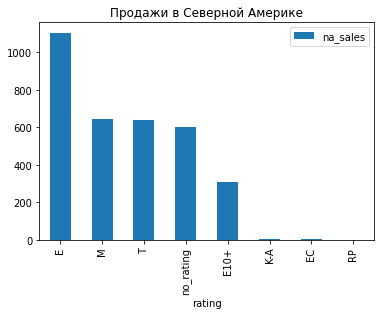

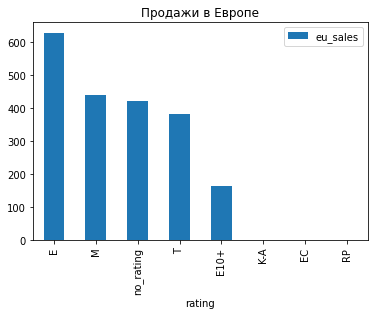

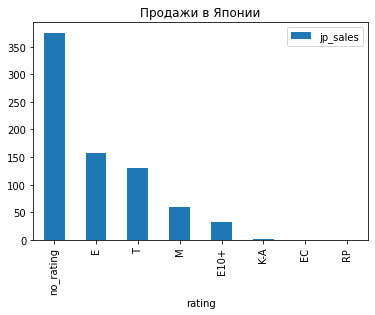

In [69]:
pivot_na_rating_sales.plot(kind = 'bar', title = 'Продажи в Северной Америке')
pivot_eu_rating_sales.plot(kind = 'bar', title = 'Продажи в Европе')
pivot_jp_rating_sales.plot(kind = 'bar', title = 'Продажи в Японии')

plt.show()


«E» («Everyone») — «Для всех». Больше всего продаж игр с таким рейтингом. 
В Японии больше всего продаж у игр, у которых отсутствует возрастной рейтинг. 
Менее всего игр с рейтингом «EC» («Early childhood») — «Для детей младшего возраста» и «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.


Вывод: анализируя будующие продажи на 2017 год можно с уверенностью сказать, что хорошие продажи можно получить у платформ 'X360','PS2','PS3','Wii','DS'. Также обратить внимание на появление новой платформы PS4. Что касается жанров, то тут самые продаваемые Action, Sport, Racing, а также в Японии - Role-Playing.

«E» («Everyone») — «Для всех». Больше всего продаж игр с таким рейтингом в Северной Америке и Европе. В Японии больше всего продаж у игр, у которых отсутствует возрастной рейтинг. 

# Проверим гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.
- Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [70]:
alpha = 0.05

удалим пропуски для 'user_score' для проведения проверки гипотез, т.к. библиотека scipy обрабатывает все значения и пропусков быть не должно

In [71]:
df = df.dropna(subset = ['user_score']).reset_index(drop = True)

In [72]:
df.platform.unique()

array(['PS3', 'X360', '3DS', 'PS4', 'Wii', 'WiiU', 'XOne', 'PC', 'PSV',
       'DS', 'PSP', 'PS2'], dtype=object)

In [73]:
xbox_df = df.query('platform == "XOne"') # провели срез по платформам
pc_df = df.query('platform == "PC"')

Для платформы Xbox One: 

In [74]:
xbox_df['user_score'].describe() # основные стат данные

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

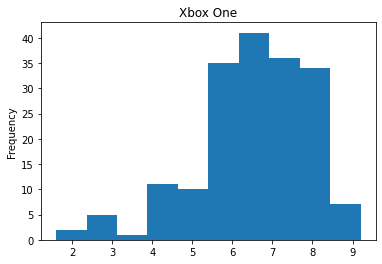

In [75]:
xbox_df['user_score'].plot(kind = 'hist', title = 'Xbox One', bins = 10)
plt.show()

Из таблицы и графика видно, что среднее по распределению 'user_score' для платформы Xbox One равно 6,5. 

In [76]:
variance_xbox = np.var(xbox_df['user_score']) # 
print('Дисперсия для платформы Xbox One равна:', variance_xbox)

Дисперсия для платформы Xbox One равна: 1.8965188383045526


In [77]:
mean_xbox = xbox_df['user_score'].mean()
print('Средняя оценка пользователей для платформы Xbox One равна', mean_xbox)

Средняя оценка пользователей для платформы Xbox One равна 6.521428571428572


In [78]:
std_xbox = xbox_df['user_score'].std()
print('Стандартное отклонение оценки пользователей для платформы Xbox One равно', std_xbox)

Стандартное отклонение оценки пользователей для платформы Xbox One равно 1.380940564592144


Для платформы PC:

In [79]:
pc_df['user_score'].describe() # основные стат данные

count    307.000000
mean       6.451792
std        1.611303
min        1.400000
25%        5.550000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

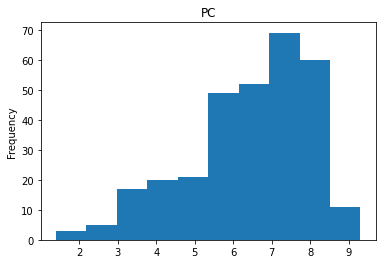

In [80]:
pc_df['user_score'].plot(kind = 'hist', title = 'PC', bins = 10)
plt.show()

In [81]:
variance_pc = np.var(pc_df['user_score']) # 
print('Дисперсия для платформы PC равна:', variance_pc)

Дисперсия для платформы PC равна: 2.5878388099608483


In [82]:
mean_pc = pc_df['user_score'].mean()
print('Средняя оценка пользователей для платформы PC равна', mean_xbox)

Средняя оценка пользователей для платформы PC равна 6.521428571428572


In [83]:
std_xbox = pc_df['user_score'].std()
print('Стандартное отклонение оценки пользователей для платформы PC равно', std_xbox)

Стандартное отклонение оценки пользователей для платформы PC равно 1.6113025164555177


Для проверки гипотезы используем распределение Стьюдента (t - тест):

In [84]:
result = st.ttest_1samp(xbox_df['user_score'], mean_pc)
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем гипотезу')
else: 
    print('Гипотеза верна')

p-значение: 0.4971832390801204
Гипотеза верна


Для проверки гипотезы используем гипотезу о равенстве средних двух генеральных совокупностей:

In [85]:
result = st.ttest_ind(xbox_df['user_score'], pc_df['user_score'])
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем гипотезу')
else: 
    print('Гипотеза верна')

p-значение: 0.6267602271422398
Гипотеза верна


* Вывод: Между средними пользовательскими рейтингами платформ Xbox One и PC нет статистически значимой разницы. 

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.
- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

In [86]:
alpha = 0.05

In [87]:
df.genre.unique()


array(['Action', 'Shooter', 'Racing', 'Platform', 'Misc', 'Simulation',
       'Role-Playing', 'Sports', 'Adventure', 'Fighting', 'Strategy',
       'Puzzle'], dtype=object)

In [88]:
action_df = df.query('genre == "Action"') # провели срез по жанрам
sports_df = df.query('genre == "Sports"')

Для жанра Action:

In [89]:
action_df['user_score'].describe() 

count    671.000000
mean       6.782712
std        1.342052
min        1.600000
25%        6.100000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

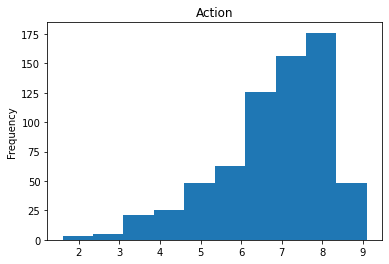

In [90]:
action_df['user_score'].plot(kind = 'hist', title = 'Action', bins = 10)
plt.show()

In [91]:
variance_action = np.var(action_df['user_score']) # 
print('Дисперсия для жанра Action равна:', variance_action)

Дисперсия для жанра Action равна: 1.7984194686845487


In [92]:
mean_action = action_df['user_score'].mean()
print('Средняя оценка пользователей для жанра Action равна', mean_action)

Средняя оценка пользователей для жанра Action равна 6.782712369597615


In [93]:
std_action = action_df['user_score'].std()
print('Стандартное отклонение оценки пользователей для жанра Action равно', std_action)

Стандартное отклонение оценки пользователей для жанра Action равно 1.3420520395449516


Для жанра Sports:

In [94]:
sports_df['user_score'].describe() 

count    247.000000
mean       5.656275
std        1.696515
min        0.200000
25%        4.400000
50%        6.000000
75%        6.900000
max        8.800000
Name: user_score, dtype: float64

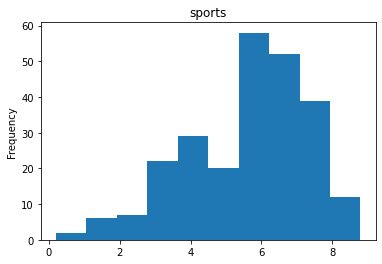

In [95]:
sports_df['user_score'].plot(kind = 'hist', title = 'sports', bins = 10)
plt.show()

In [96]:
variance_sports = np.var(sports_df['user_score']) # 
print('Дисперсия для жанра sports равна:', variance_sports)

Дисперсия для жанра sports равна: 2.8665092035601303


In [97]:
mean_sports = sports_df['user_score'].mean()
print('Средняя оценка пользователей для жанра sports равна', mean_sports)

Средняя оценка пользователей для жанра sports равна 5.656275303643724


In [98]:
std_sports = sports_df['user_score'].std()
print('Стандартное отклонение оценки пользователей для жанра sports равно', std_sports)

Стандартное отклонение оценки пользователей для жанра sports равно 1.6965145681653804


Для проверки гипотезы используем распределение Стьюдента (t - тест):

In [99]:
result = st.ttest_1samp(sports_df['user_score'], mean_action)
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем гипотезу')
else: 
    print('Гипотеза верна')

p-значение: 2.4093954754071e-21
Отвергаем гипотезу


Для проверки гипотезы используем гипотезу о равенстве средних двух генеральных совокупностей:

In [100]:
result = st.ttest_ind(action_df['user_score'], sports_df['user_score'])
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем гипотезу')
else: 
    print('Гипотеза верна')

p-значение: 2.65939241959414e-24
Отвергаем гипотезу


Вывод: Средние значения пользовательских рейтингов жанров Action и Sports статистически различны. 


# Общий вывод

1. Открыли файл с даннами, изучили общую информацию, определили наличие пропусков, необходимость привести к стандартному виду названия столбцов, а также изменение некоторых типов данных.

2. Провели подготовку данных: избавились от пропусков, изменили типы данных, названия столбцов. Создали столбец с суммой продаж по всем регионам.

3. Провели исследовательский анализ данных: 
    - проанализировали количество игр за разные периоды, выбрали актуальный период.  Актуальным является период с 2011 года, этот пириод будет влиять на продажи в 2017. 
    - изучили продажи по платформам. Выявили платформы с наибольшими суммарными продажами. А также установили платформы, которые будут лидировать в 2017 году: PS4, DS. 
    - Построила график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Выявила очень успешные по продажам платформы. Это DS, GB, PS2, PS3, Wii и X360. Это платформы, где суммарное значение продаж значительно превышает среднее
    - Построила диаграмму рассеяния и посчитала корреляцию между отзывами и продажами. Определила, что связь между отзывами и продажами слабая, для 10 топовых платформ.
    - Самые покупаемые игры жанра Action, Shooter, Sports наименее всего покупают Puzzle и Strategy. 

4. Составили портрет пользователя каждого региона:
 - PS2 платформа входит в пятерку самых продаваемых по рассматриваемым регионам мира.
 - Action самый популярный жанр по всем рассматриваемым регионам.
 - «E» («Everyone») — «Для всех». Больше всего продаж игр с таким рейтингом в Северной Америке и Европе. В Японии больше всего продаж у игр, у которых отсутствует возрастной рейтинг.



4. Проверка гипотез показала: 
    - Между средними пользовательскими рейтингами платформ Xbox One и PC нет статистически значимой разницы.
    - Средние значения пользовательских рейтингов жанров Action и Sports статистически различны. 